<a href="https://colab.research.google.com/github/jilliankim/vanderbilt-sp24-cs5262-jinkim/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Background

The project goal is to find the segments of the consumers to create an effective marketing strategies for different segments of consumers by studying the dataset here https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data.

- Project Description

The dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. Studying this dataset will yield different segments of users, like frequent online shopper on fashion items, or infrequent offline shopper on sports items, etc and provide potential marketing strategies for lucrative commercial business. We may focus only on online shopping for the starter, and may expand into offline consumers, as the advertisement targeting is much easier on online shopping.

- Performance Metric

1. Seasonal expenditure based on customer segmantation
2. Purchases on different categories
3. Purchases based on gender
4. Customer distribution by location
5. ..and other metrics


In [31]:
! pip install kaggle

In [32]:
# Importing Necessary Libararies
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from tqdm import tqdm

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [33]:
data_file_path = "~/.kaggle/shopping_behavior_updated.csv"
df = pd.read_csv(data_file_path)

# setting Customer ID as index as it is unique for each row
df = df.set_index('Customer ID')

# showing the dataframe
print("Shape:", df.shape)
df.head()

Shape: (3900, 17)


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [34]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [36]:
# Separate columns based on data type
cols_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_numpy()
cols_categorical = df.select_dtypes(exclude=['int64', 'float64']).columns.to_numpy()

print("Total Number of Columns:", len(cols_categorical) + len(cols_numeric))
print("\nTotal Numerical Columns:", len(cols_numeric))
print("Numerical Columns:", cols_numeric)
print("\nTotal Categorical Columns:", len(cols_categorical))
print("Categorical Columns:", cols_categorical)

Total Number of Columns: 17

Total Numerical Columns: 4
Numerical Columns: ['Age' 'Purchase Amount (USD)' 'Review Rating' 'Previous Purchases']

Total Categorical Columns: 13
Categorical Columns: ['Gender' 'Item Purchased' 'Category' 'Location' 'Size' 'Color' 'Season'
 'Subscription Status' 'Shipping Type' 'Discount Applied'
 'Promo Code Used' 'Payment Method' 'Frequency of Purchases']


## EDA for distribution studies

Q1. What does the population distribution look like? Male vs Female?

Q2. What does the spending category distribution look like?

Q3. Is there seasonality in spending?

## Answers

A1. Looking at the pie chart, there were more women than men who bought stuff.

A2. Spending category was high in clothing (45%) and followed by accessories (33%), and others

A3. There wasn't any seasonality (all seasons were eqaully partitioned, roughly 25%) but I'm not sure if the data was pulled to not have seasonality.

In [37]:
sub_df = df[cols_categorical]
sub_df

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,
1,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Express,Yes,Yes,Venmo,Fortnightly
2,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Express,Yes,Yes,Cash,Fortnightly
3,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly
4,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,Yes,Yes,PayPal,Weekly
5,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Free Shipping,Yes,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,Female,Hoodie,Clothing,Virginia,L,Turquoise,Summer,No,2-Day Shipping,No,No,Venmo,Weekly
3897,Female,Backpack,Accessories,Iowa,L,White,Spring,No,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3898,Female,Belt,Accessories,New Jersey,L,Green,Spring,No,Standard,No,No,Venmo,Quarterly


In [38]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

for column in sub_df.columns:
    cols_threshold = 7
    if len(sub_df[column].unique()) > cols_threshold:
        continue

    fig = px.pie(sub_df, names=column, title=f'Pie Chart for {column}', hole=0.4,
                 color_discrete_sequence=px.colors.qualitative.Plotly, labels={'': column})

    fig.update_traces(textposition='inside', textinfo='percent+label')

    # Customize layout
    fig.update_layout(
        title={'text': f'Pie Chart for {column}', 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'},
        margin=dict(l=0, r=0, b=0, t=60),
        legend=dict(x=0.8, y=0.5, title=dict(text='Legend')),
        font=dict(family='Arial, sans-serif', size=12, color='white'),  # Update font color
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode='closest'
    )

    # Add a sunburst effect
    fig.update_traces(marker=dict(line=dict(color='black', width=2)))

    fig.show()

In [39]:
sub_df = df[cols_numeric]
sub_df

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,,,,
1,55,53,3.1,14
2,19,64,3.1,2
3,50,73,3.1,23
4,21,90,3.5,49
5,45,49,2.7,31
...,...,...,...,...
3896,40,28,4.2,32
3897,52,49,4.5,41
3898,46,33,2.9,24


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

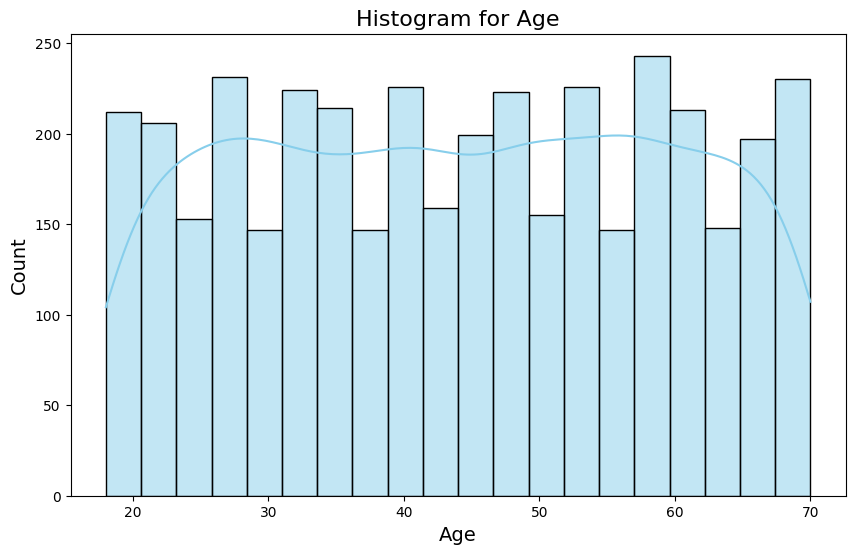

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Purchase Amount (USD)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Purchase Amount (USD)')

Text(0.5, 0, 'Purchase Amount (USD)')

Text(0, 0.5, 'Count')

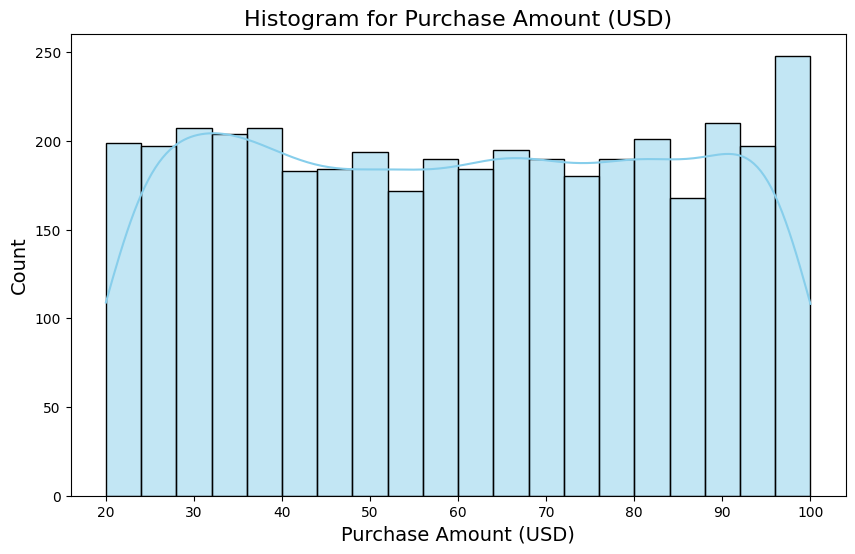

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Review Rating', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Review Rating')

Text(0.5, 0, 'Review Rating')

Text(0, 0.5, 'Count')

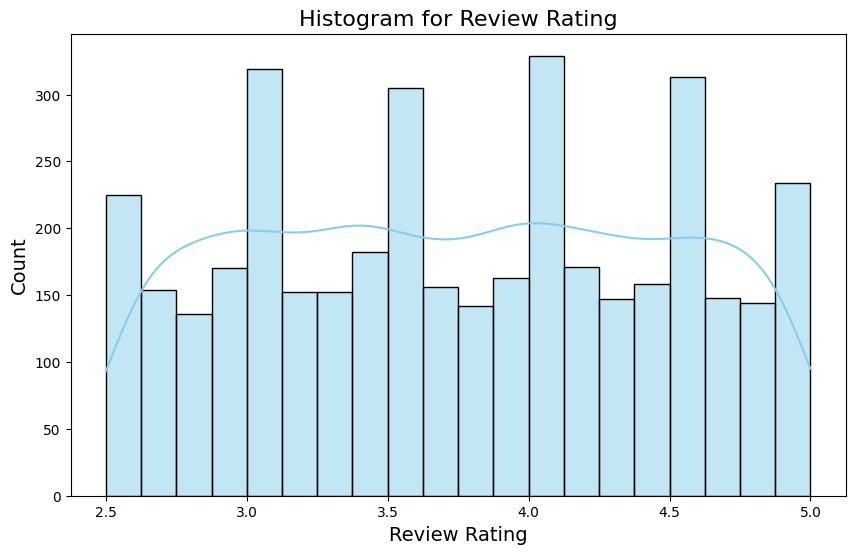

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Previous Purchases', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for Previous Purchases')

Text(0.5, 0, 'Previous Purchases')

Text(0, 0.5, 'Count')

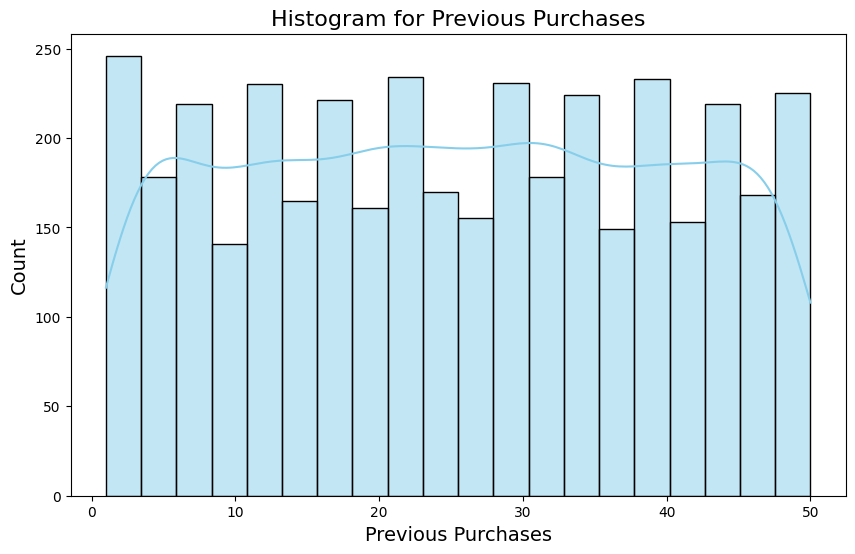

In [40]:
# Loop through each column and draw a histogram
for column in sub_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(sub_df[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

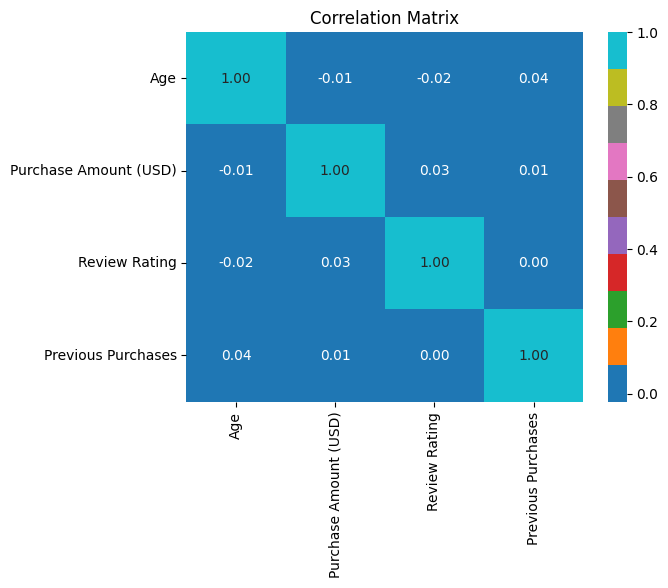

In [41]:
# Plot the heatmap
sns.heatmap(df[cols_numeric].corr(), annot=True, cmap='tab10', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

Looking at the dataset, it looks like previous purchase and gender would give some stable result, whereas purchase amount seems to be not a good measurement (meaning no significant correlation).
Other good features that I can think of to use are seasonality, frequency, subscription, and maybe explore previous purchases.

## Train Test Split

I'll be using random seed to do train/test split, 70/30 or 80/20 and see if the split would make differences. I can also apply `stratify` for k-folds.

## Establishing an initial pipeline

This dataset is pretty clean and I don't see the need of using imputer or column transformer. I may do more EDA to see if I can clean more, but from the initial state, the dataset seems to be solid. I think the only thing I can think of using is `fit_transformation`

## Model Fitting and Evaluation

1. Age/annual income/spending habits will definitely be important features to include, which may yield high ROC curve values
2. chi-square test for feature importance should be done to correctly anticipate segments



